In [1]:
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

warnings.filterwarnings('ignore')

In [2]:

from kmeans_methods import Mod_KMeans
methods = Mod_KMeans()

In [3]:
df_scaled = methods.import_df('df_scaled.csv')
df_scaled.set_index('country',inplace=True)

In [4]:
df_scaled

,Unnamed: 0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,,
Afghanistan,0,1.293209,-1.151711,0.270184,-0.094941,-0.811210,0.156444,-1.617656,1.895761,-0.681962
Albania,1,-0.534110,-0.490567,-0.108379,0.059653,-0.378996,-0.311838,0.643728,-0.859864,-0.488736
Algeria,2,-0.268453,-0.108573,-0.983118,-0.659002,-0.224708,0.786497,0.666229,-0.040445,-0.468523
Angola,3,2.008247,0.769279,-1.468268,-0.178506,-0.588349,1.382492,-1.178880,2.120441,-0.519329
Antigua and Barbuda,4,-0.690524,0.152211,-0.299499,0.490011,0.097375,-0.600376,0.699981,-0.542670,-0.045687
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,162,-0.221281,0.192614,-0.586178,0.230960,-0.741598,-0.488745,-0.852611,0.362656,-0.549922
Venezuela,163,-0.521696,-0.472202,-0.711141,-1.235598,-0.037692,3.605651,0.542472,-0.317990,0.025332
Vietnam,164,-0.367764,1.125562,-0.001793,1.379973,-0.661597,0.408087,0.283706,-0.661618,-0.640607


A Coluna Unnamed 0 não é útil para nosso estudo, portanto iremos remove-la

In [5]:
df_scaled.drop(columns='Unnamed: 0', inplace=True)

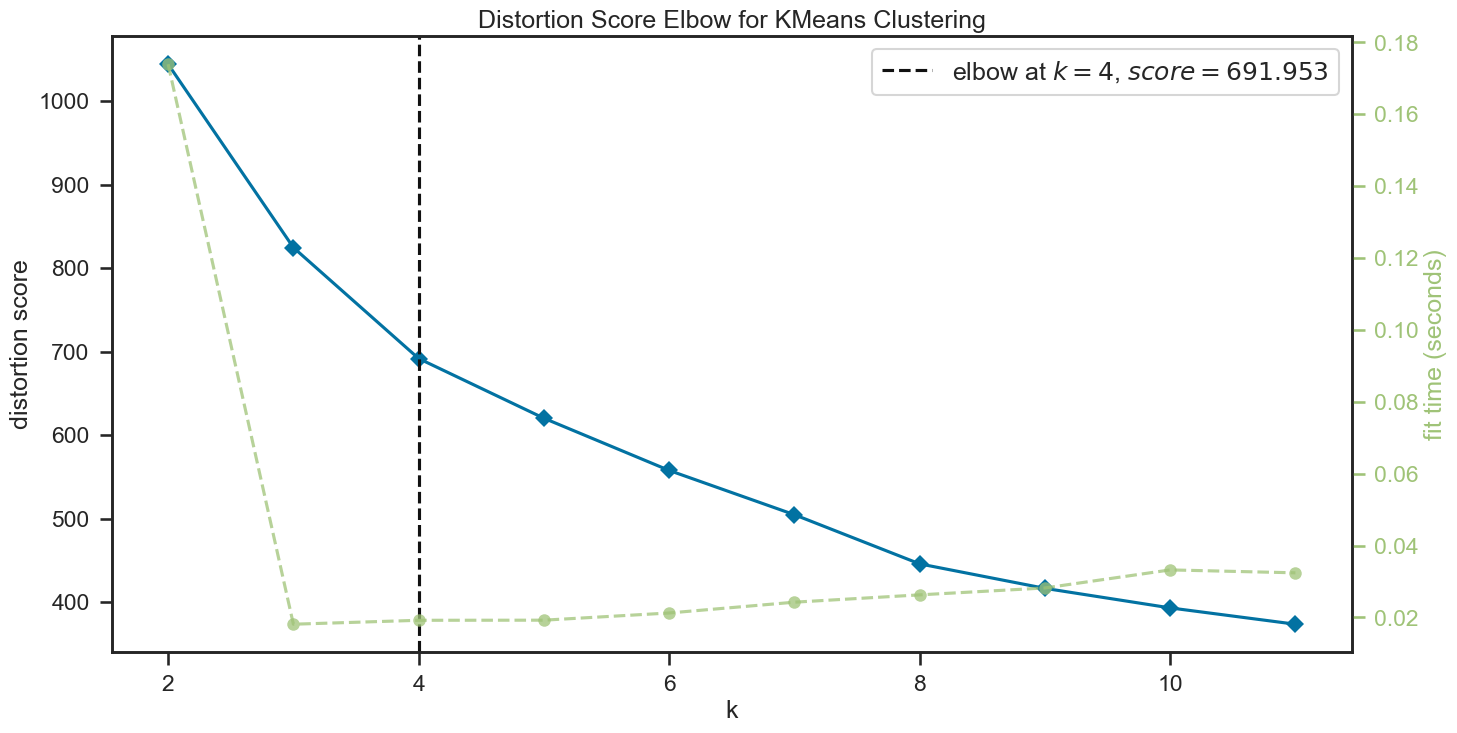

In [6]:
_model = KMeans()
fig, ax =plt.subplots(1, 1, figsize=(16, 8))
visualizer = KElbowVisualizer(_model, k=(2, 12), ax=ax)
visualizer.fit(df_scaled)
visualizer.show();

O método do cotovelo aponta que o ideal para este tratamento seria 5 clusters, portanto é pedido que se use apenas 3 clusters e assim será feito.

In [7]:
cluster_kmeans = methods.clustering_kmeans(df_scaled, 3)
df_scaled['cluster_kmeans'] = cluster_kmeans
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans
country,,,,,,,,,,
Afghanistan,1.293209,-1.151711,0.270184,-0.094941,-0.811210,0.156444,-1.617656,1.895761,-0.681962,1
Albania,-0.534110,-0.490567,-0.108379,0.059653,-0.378996,-0.311838,0.643728,-0.859864,-0.488736,0
Algeria,-0.268453,-0.108573,-0.983118,-0.659002,-0.224708,0.786497,0.666229,-0.040445,-0.468523,0
Angola,2.008247,0.769279,-1.468268,-0.178506,-0.588349,1.382492,-1.178880,2.120441,-0.519329,1
Antigua and Barbuda,-0.690524,0.152211,-0.299499,0.490011,0.097375,-0.600376,0.699981,-0.542670,-0.045687,0
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221281,0.192614,-0.586178,0.230960,-0.741598,-0.488745,-0.852611,0.362656,-0.549922,0
Venezuela,-0.521696,-0.472202,-0.711141,-1.235598,-0.037692,3.605651,0.542472,-0.317990,0.025332,0
Vietnam,-0.367764,1.125562,-0.001793,1.379973,-0.661597,0.408087,0.283706,-0.661618,-0.640607,0


In [8]:
methods.count_clusters(df_scaled, 'cluster_kmeans')

A quantidade de países no cluster 0 é 84
A quantidade de países no cluster 1 é 46
A quantidade de países no cluster 2 é 36


In [9]:
methods.metrics_model(df_scaled, 3)

Índice de Devies-Bouldin: 1.1254537426333622


In [10]:
df_scaled.reset_index(inplace=True)

____________________________________________________________________________________________________
O cluster 1 possui 46 países, sendo eles: 

 ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
____________________________________________________________________________________________________
Estatística descritiva do cluster 1

____________________________________________________________________________________________________
       child_mort    exports     health    imports     inco

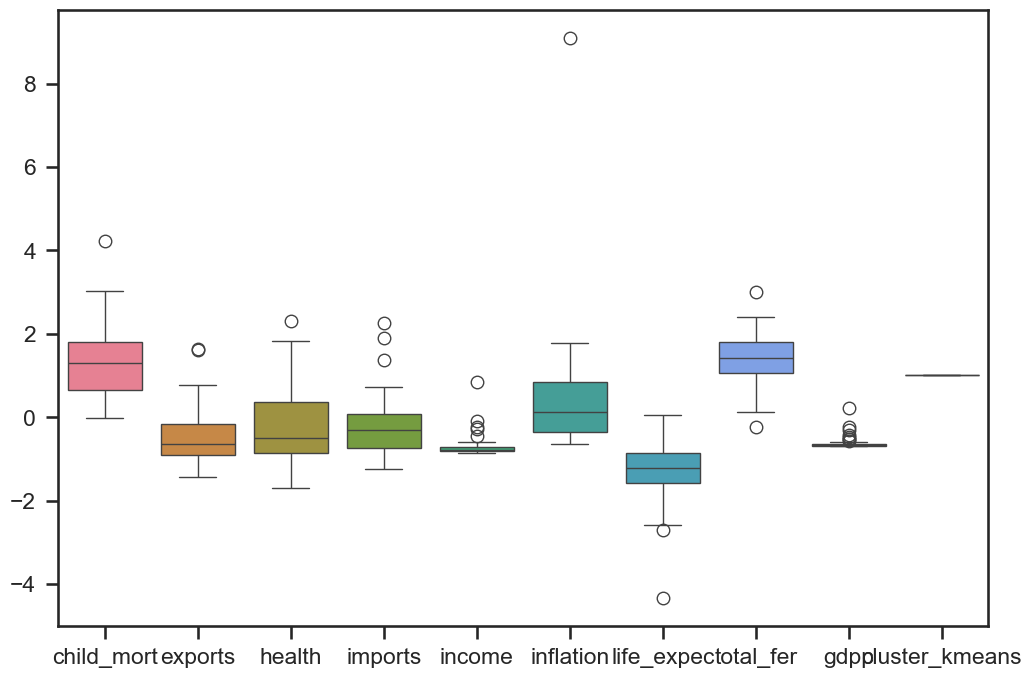

____________________________________________________________________________________________________
O cluster 0 possui 84 países, sendo eles: 

 ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Solomon Islands', 'S

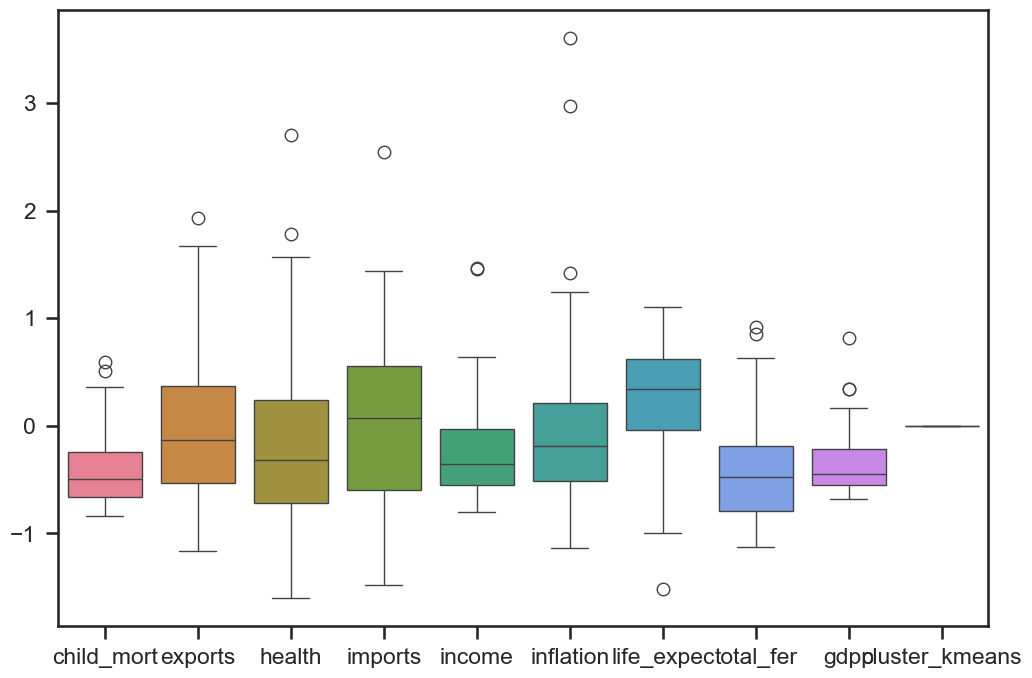

____________________________________________________________________________________________________
O cluster 2 possui 36 países, sendo eles: 

 ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
____________________________________________________________________________________________________
Estatística descritiva do cluster 2

____________________________________________________________________________________________________
       child_mort    exports     health    imports     income  inflation  \
count   36.000000  36.000000  36.000000  36.000000  36.000000  36.000000   
mean    -0.822111  

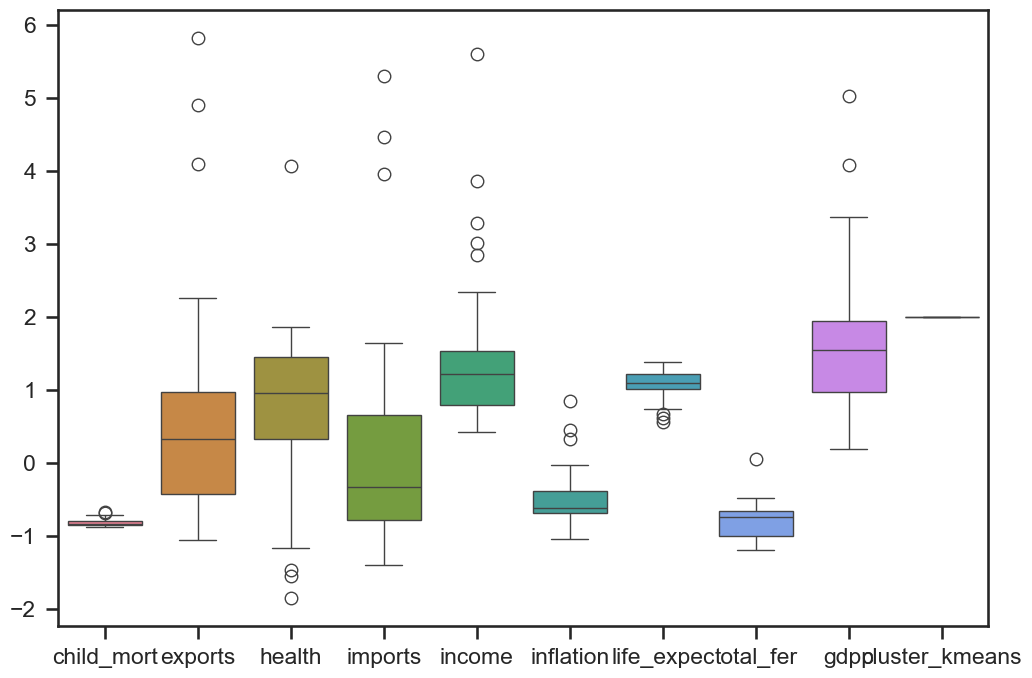

In [11]:
methods.report_clustering(df_scaled, 'cluster_kmeans')

Na preparação dos dados, com o uso de heatmap foi possível notar que há uma correlação entre algumas variáveis, que pode resultar em um enviesamento. Portanto será aplicado PCA  paara que não haja muitas perdas. 


In [12]:
df_pca = methods.method_pca(df_scaled.drop(columns='country'), 6)

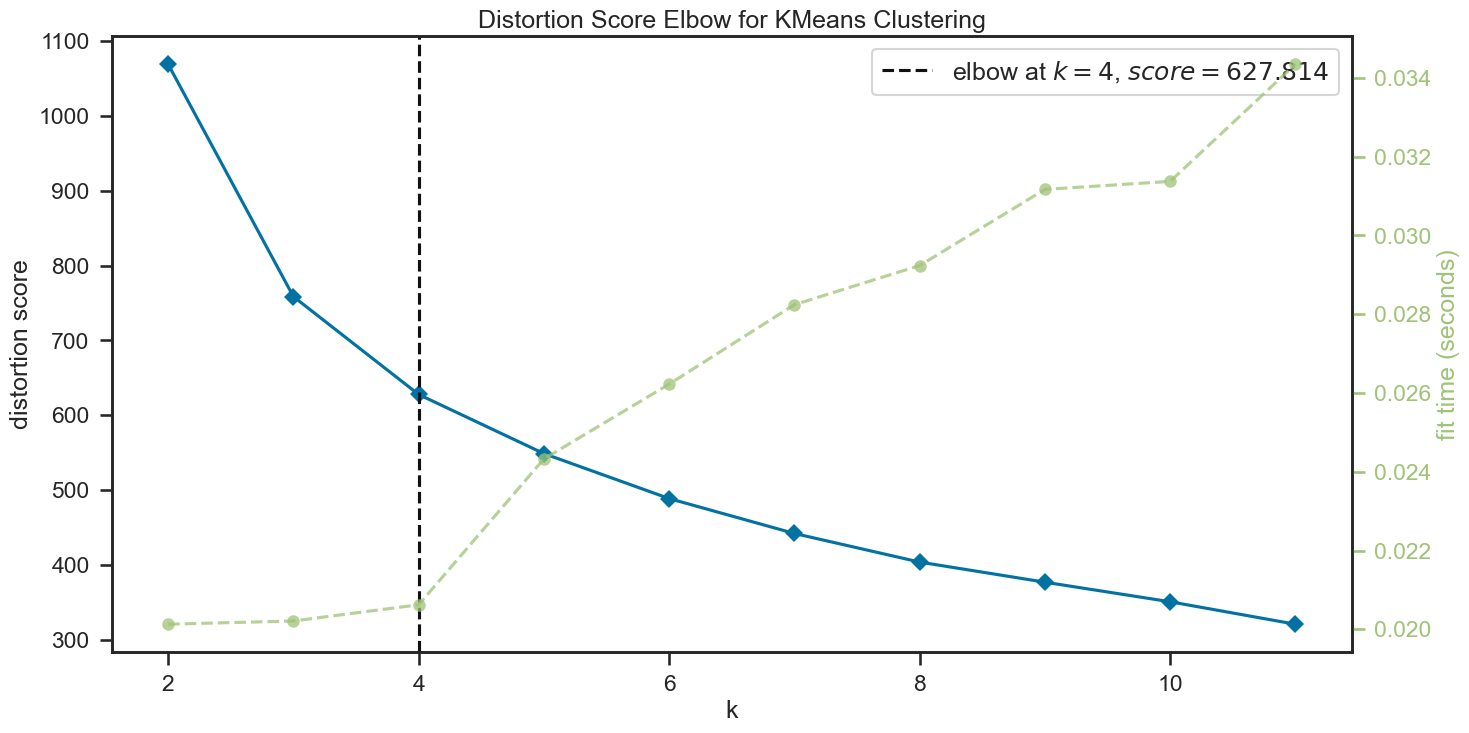

In [13]:
_model = KMeans()
fig, ax =plt.subplots(1, 1, figsize=(16, 8))
visualizer = KElbowVisualizer(_model, k=(2, 12), ax=ax)
visualizer.fit(df_pca)
visualizer.show();

Com o uso do PCA é possível notar no metodo de cotovelo que o resultado é mais próximo ao que nos foi pedido

(<Figure size 800x550 with 2 Axes>, <Axes: >, <Axes: >)

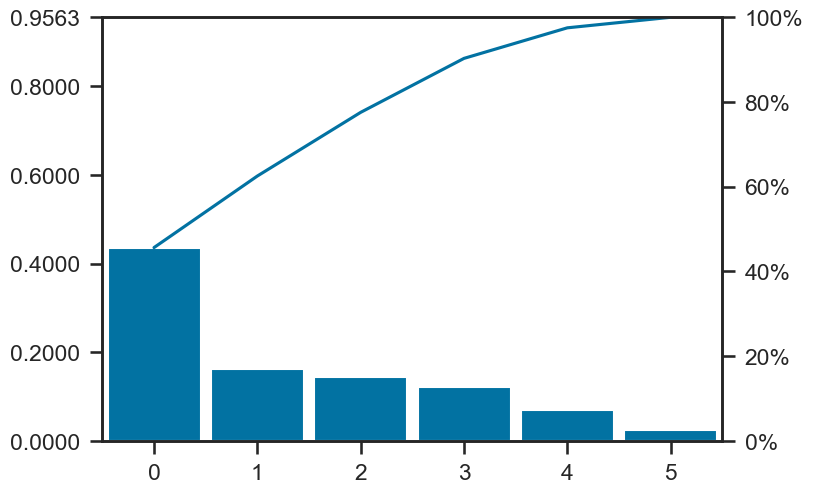

In [14]:
methods.pca_(df_scaled.drop(columns='country'),6)

A escolha por 6 componentes foi uma boa, apresentando um intervalo de confiançaa de 95%

In [15]:
cluster_kmeans_pca = methods.clustering_kmeans(df_pca, 3)
df_pca['cluster_kmeans_pca'] = cluster_kmeans_pca
df_pca

,0,1,2,3,4,5,cluster_kmeans_pca
0,-2.824725,0.042100,1.266415,-0.744384,-0.053913,-0.193745,1
1,0.281756,-0.586464,-1.422456,-0.271431,0.008116,0.034977,2
2,-0.415033,-0.428037,-1.058178,1.277218,0.016541,-0.373328,2
3,-2.841820,1.705593,1.236693,1.468205,-0.186659,-0.505488,1
4,0.887638,0.142375,-1.180984,-0.190257,-0.272189,-0.117993,2
...,...,...,...,...,...,...,...
161,-0.940363,0.634606,-0.865653,-0.367326,-0.465771,0.092810,2
162,-0.668848,-1.204135,-0.570768,3.159059,2.022708,0.077079,2
163,0.345211,1.388110,-1.437598,-0.223309,1.038786,-0.058103,2
164,-1.834918,-0.108290,0.371305,1.120429,0.519661,-0.675602,1


In [16]:
methods.count_clusters(df_pca, 'cluster_kmeans_pca')

A quantidade de países no cluster 2 é 84
A quantidade de países no cluster 1 é 46
A quantidade de países no cluster 0 é 36


In [17]:
methods.metrics_model(df_pca.drop(columns='cluster_kmeans_pca'),3)

Índice de Devies-Bouldin: 1.0660727113445352


In [18]:
df_pca['country'] = df_scaled['country']

____________________________________________________________________________________________________
O cluster 1 possui 46 países, sendo eles: 

 ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
____________________________________________________________________________________________________
Estatística descritiva do cluster 1

____________________________________________________________________________________________________
               0          1          2          3          

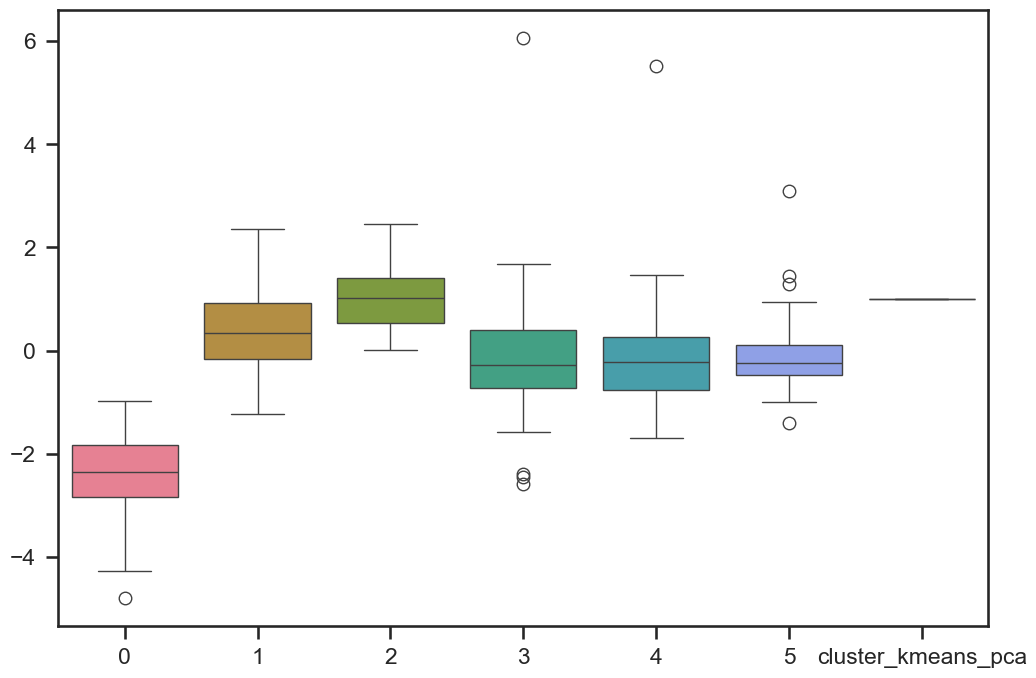

____________________________________________________________________________________________________
O cluster 2 possui 84 países, sendo eles: 

 ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Solomon Islands', 'S

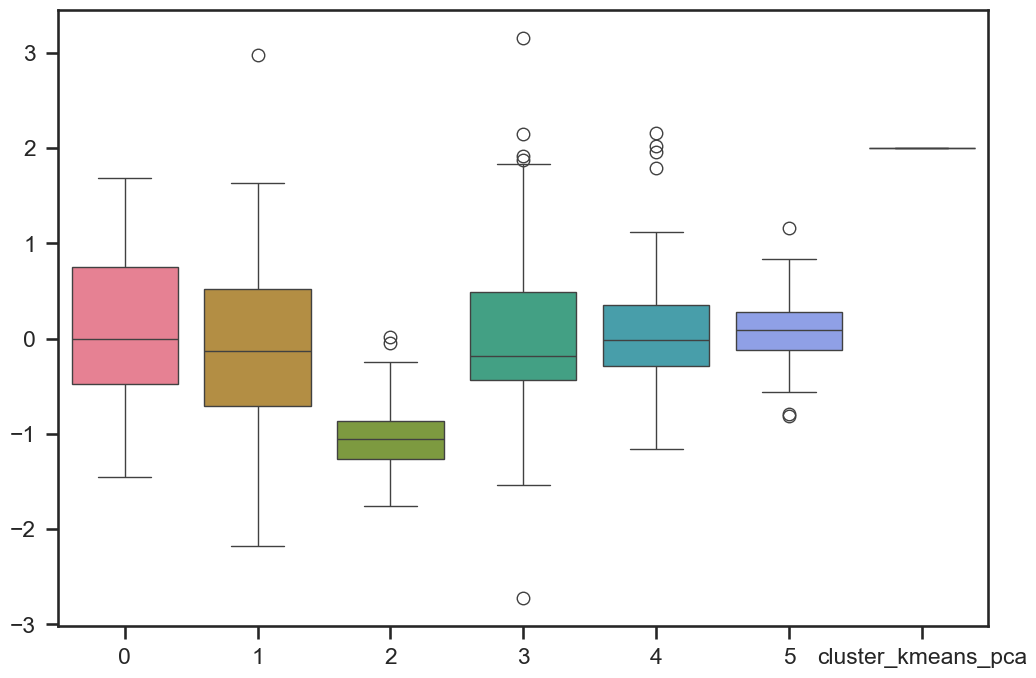

____________________________________________________________________________________________________
O cluster 0 possui 36 países, sendo eles: 

 ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
____________________________________________________________________________________________________
Estatística descritiva do cluster 0

____________________________________________________________________________________________________
               0          1          2          3          4          5  \
count  36.000000  36.000000  36.000000  36.000000  36.000000  36.000000   
mean    2.934378  -0.

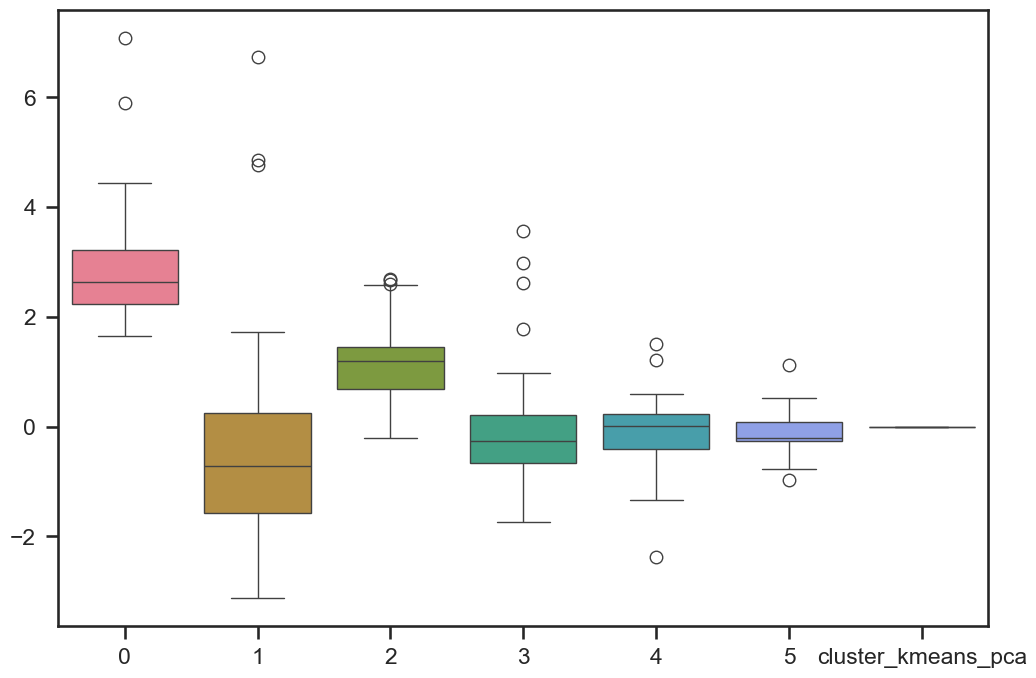

In [19]:
methods.report_clustering(df_pca, 'cluster_kmeans_pca')

### Agora iremos chegar a conclusão de qual país melhor representa cada cluster
Lembrando que o país mais próximo do centróide é o nosso alvo

In [20]:
df_best_point = df_scaled.set_index('country')

In [21]:
methods.best_point_np(df_best_point, 'cluster_kmeans', 3)

 O país com melhor ponto médio de cluster 0 é: TUNISIA
 O país com melhor ponto médio de cluster 1 é: TANZANIA
 O país com melhor ponto médio de cluster 2 é: FINLAND


### Com uso de PCA

In [22]:
df_best_point_pca = df_pca.set_index('country')
methods.best_point_np(df_best_point_pca, 'cluster_kmeans_pca', 3)

 O país com melhor ponto médio de cluster 0 é: FINLAND
 O país com melhor ponto médio de cluster 1 é: TANZANIA
 O país com melhor ponto médio de cluster 2 é: SURINAME
